In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_train = pd.read_csv("twitter_training.csv")
df_val = pd.read_csv("twitter_validation.csv")  

In [2]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [6]:
df_train = df_train.rename(columns={'2401': 'ID', 'Borderlands': 'platform', 'Positive': 'sentimen', 'im getting on borderlands and i will murder you all ,': 'text'})
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})
print(df_train["sentimen"].value_counts())
print(df_val["sentimen"].value_counts())

sentimen
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [7]:
print("Platform Count - Training")
print(df_train["platform"].value_counts())
print(20*"=")
print("Platform Count - Validation")
print(df_val["platform"].value_counts())

Platform Count - Training
platform
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304

In [8]:
df_train = df_train.drop(["ID", "platform"], axis=1)
df_val = df_val.drop(["ID", "platform"], axis=1)

In [9]:
print(f"Rows: {df_train.shape[0]}, columns: {df_train.shape[1]}")
print(f"duplicate: {df_train.duplicated().sum()}")
print(f"missing data: {df_train.isna().sum()}")

print(20*"=")

print(f"Rows: {df_val.shape[0]}, columns: {df_val.shape[1]}")
print(f"duplicate: {df_val.duplicated().sum()}")
print(f"missing data: {df_val.isna().sum()}")


Rows: 74681, columns: 2
duplicate: 4909
missing data: sentimen      0
text        686
dtype: int64
Rows: 999, columns: 2
duplicate: 1
missing data: sentimen    0
text        0
dtype: int64


In [10]:
kolom1=len(df_train.columns)
for i in range (0, kolom1):
  df_train=df_train[df_train.iloc[:,i]!='?']
  df_train=df_train[df_train.iloc[:,i]!='']
  df_train=df_train[~df_train.iloc[:,i].isna()]
df_train.info()
df_train.drop_duplicates(keep= 'first',inplace = True)

kolom=len(df_val.columns)
for i in range (0, kolom):
  df_val=df_val[df_val.iloc[:,i]!='?']
  df_val=df_val[df_val.iloc[:,i]!='']
  df_val=df_val[~df_val.iloc[:,i].isna()]
df_val.info()
df_val.drop_duplicates(keep= 'first',inplace = True)

print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}") 
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}") 
print(f"missing data: {sum(df_val.isna().sum())}")

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  73995 non-null  object
 1   text      73995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
Rows: 69768, Columns: 2
Duplicates: 0
missing data: 0
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0


In [11]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not",
}

def get_wordnet_pos(word):
    """
    Helper function: 
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Malv\AppData\Roaming\nltk_data.

In [12]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)

print(df_train[['text', 'clean_text']])

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                              clean_text  
0                                       come border kill  
1                                 im get borderland kill  
2                              im come borderland murder  
3                               im get bord

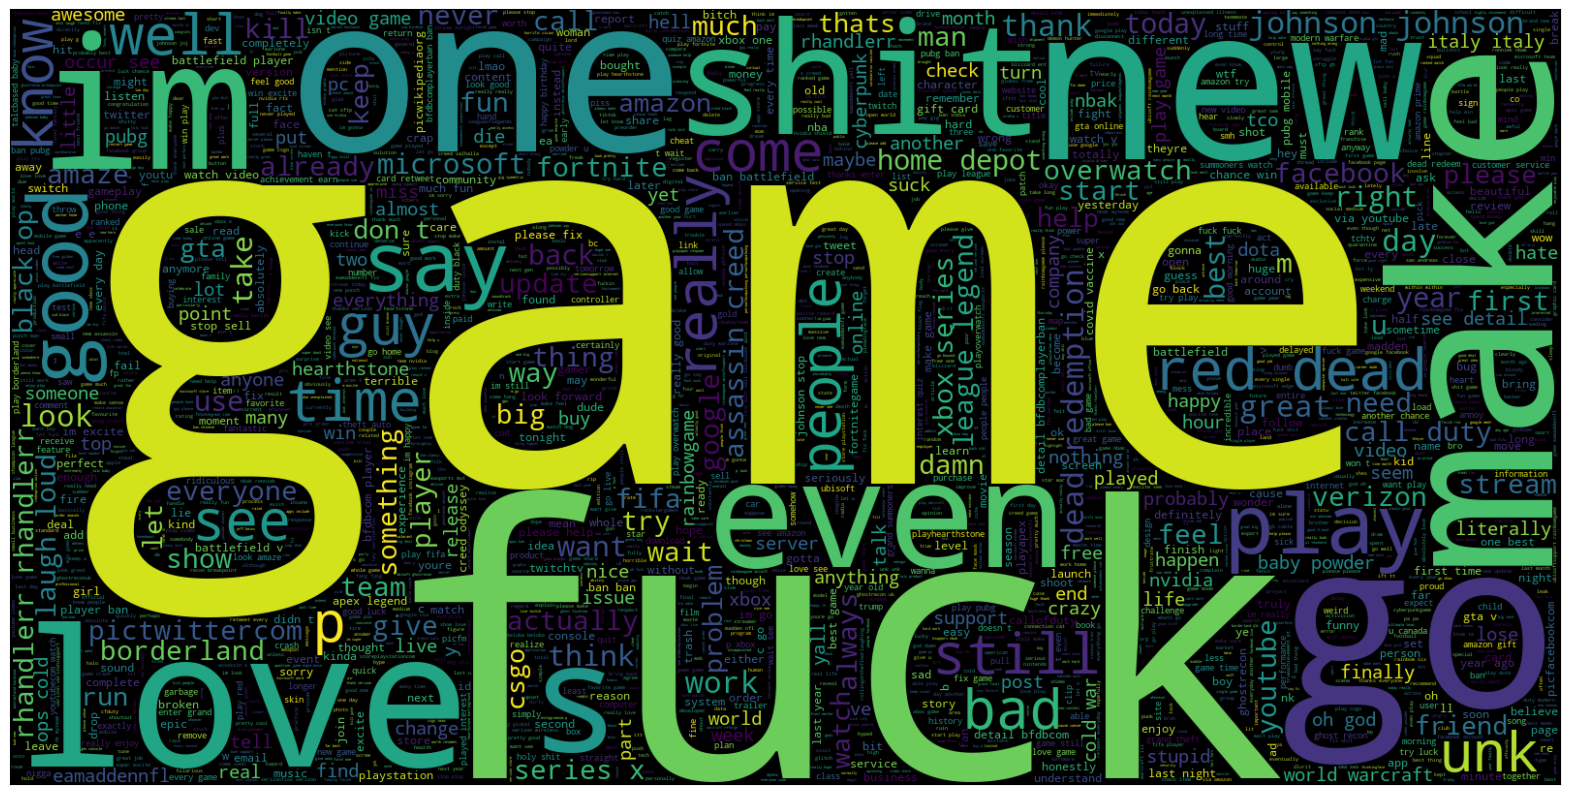

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
df_val['clean_text'] = df_val['text'].apply(preprocess_text)

print(df_val[['text', 'clean_text']])

                                                  text  \
0    BBC News - Amazon boss Jeff Bezos rejects clai...   
1    @Microsoft Why do I pay for WORD when it funct...   
2    CSGO matchmaking is so full of closet hacking,...   
3    Now the President is slapping Americans in the...   
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...   
..                                                 ...   
994  ⭐️ Toronto is the arts and culture capital of ...   
995  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
996  Today sucked so it’s time to drink wine n play...   
997  Bought a fraction of Microsoft today. Small wins.   
998  Johnson & Johnson to stop selling talc baby po...   

                                            clean_text  
0    bbc news amazon bos jeff bezos reject claim co...  
1    microsoft pay word function poorly samsungus c...  
2    csgo matchmaking full closet hack truly awful ...  
3    president slap american face really commit unl...  
4    hi eahelp i’v

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tfidf = TfidfVectorizer(max_features=17000, ngram_range=(1,2))

x_train = tfidf.fit_transform(df_train['clean_text'])
x_test = tfidf.transform(df_val['clean_text'])

y_train = df_train['sentimen']
y_test = df_val['sentimen']

In [16]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model klasifikasi multi-class:
      - ROC & AUC (macro)
      - Akurasi
      - F1-score (macro)
      - ROC Curve Plot
    Dapat digunakan untuk SVM, Random Forest, Logistic Regression, dll.
    """

    # Prediksi label
    y_pred = model.predict(X_test)

    # Coba ambil skor probabilitas atau decision function
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        decision_scores = model.predict_proba(X_test)
    else:
        raise ValueError(f"Model {model_name} tidak mendukung ROC (butuh decision_function atau predict_proba)")

    # Binarisasi label untuk ROC multi-class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Hitung ROC curve dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC rata-rata (macro)
    roc_auc["macro"] = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi Klasifikasi     : {accuracy * 100:.2f}%")
    print(f"F-measure (macro avg)   : {f1:.3f}")
    print(f"AUC rata-rata (macro)   : {roc_auc['macro']:.3f}")
    print("=" * 45)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Garis diagonal (baseline)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        "model": model_name,
        "accuracy": accuracy,
        "f1_macro": f1,
        "auc_macro": roc_auc["macro"]
    }

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


accuracy: 0.9008016032064128
classification:               precision    recall  f1-score   support

  Irrelevant       0.90      0.87      0.89       171
    Negative       0.87      0.94      0.90       266
     Neutral       0.94      0.87      0.90       285
    Positive       0.90      0.91      0.90       276

    accuracy                           0.90       998
   macro avg       0.90      0.90      0.90       998
weighted avg       0.90      0.90      0.90       998



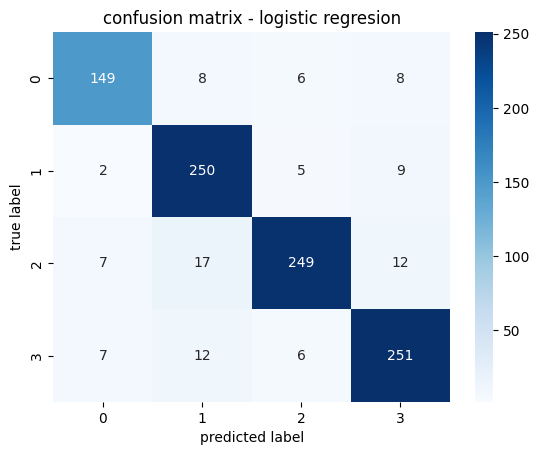

In [18]:
y_predlr = model.predict(x_test)

print("accuracy:",accuracy_score(y_test,y_predlr))
print("classification:",classification_report(y_test,y_predlr))

cm = confusion_matrix(y_test,y_predlr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix - logistic regresion")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

======= Evaluasi Klasifikasi Logistic Regression =======
Akurasi Klasifikasi     : 90.08%
F-measure (macro avg)   : 0.899
AUC rata-rata (macro)   : 0.972


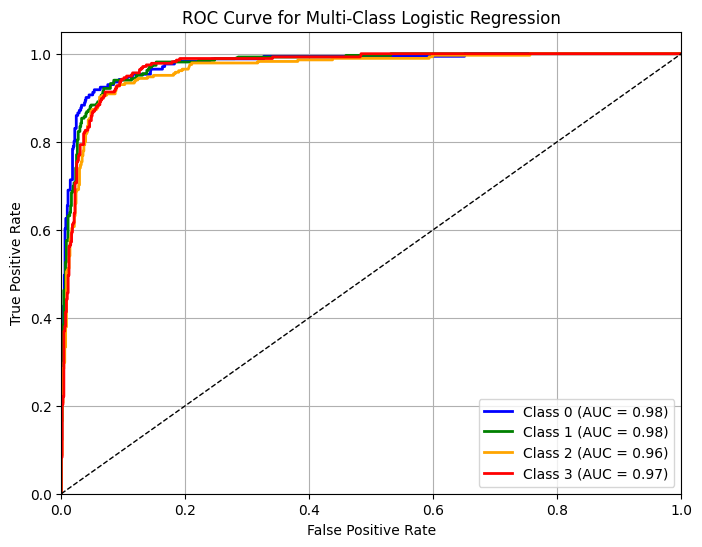

In [19]:
lr_results = evaluate_model(model, x_test, y_test, model_name="Logistic Regression")

### ===================================

buat 1 data baru (input baru kedalam ini)

training pakai model random forest dan svm

opsional = menggunakan xgboost

In [20]:
new_data = pd.DataFrame({
    'sentimen': ['Positive'],
    'text': ["Just bought the new iPhone and I'm absolutely loving it! The camera quality is amazing 📸"]
})

new_data['clean_text'] = new_data['text'].apply(preprocess_text)

print("New Test Data:")
print(new_data)
print("\n" + "="*50)

x_new = tfidf.transform(new_data['clean_text'])

prediction = model.predict(x_new)
prediction_proba = model.predict_proba(x_new)

print("\nPrediction Results:")
print(f"Actual Sentiment: {new_data['sentimen'].values[0]}")
print(f"Predicted Sentiment: {prediction[0]}")
print(f"\nPrediction Probabilities:")
for i, label in enumerate(model.classes_):
    print(f"  {label}: {prediction_proba[0][i]:.4f}")

New Test Data:
   sentimen                                               text  \
0  Positive  Just bought the new iPhone and I'm absolutely ...   

                                          clean_text  
0  bought new iphone im absolutely love camera qu...  


Prediction Results:
Actual Sentiment: Positive
Predicted Sentiment: Positive

Prediction Probabilities:
  Irrelevant: 0.2544
  Negative: 0.1060
  Neutral: 0.1498
  Positive: 0.4898


Training Random Forest Model...

=== Random Forest Results ===
Accuracy: 0.9609218436873748

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.99      0.96      0.97       171
    Negative       0.95      0.96      0.96       266
     Neutral       0.96      0.96      0.96       285
    Positive       0.95      0.96      0.96       276

    accuracy                           0.96       998
   macro avg       0.96      0.96      0.96       998
weighted avg       0.96      0.96      0.96       998



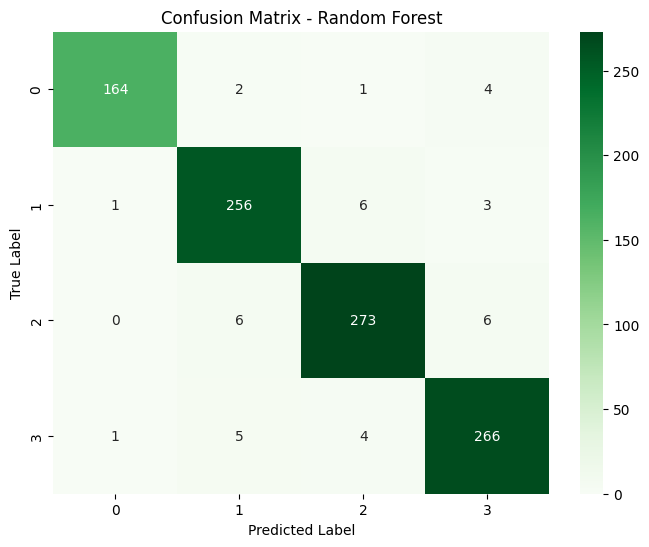

In [21]:
# ===================================
# RANDOM FOREST MODEL
# ===================================

from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

======= Evaluasi Klasifikasi Random Forest =======
Akurasi Klasifikasi     : 96.09%
F-measure (macro avg)   : 0.962
AUC rata-rata (macro)   : 0.998


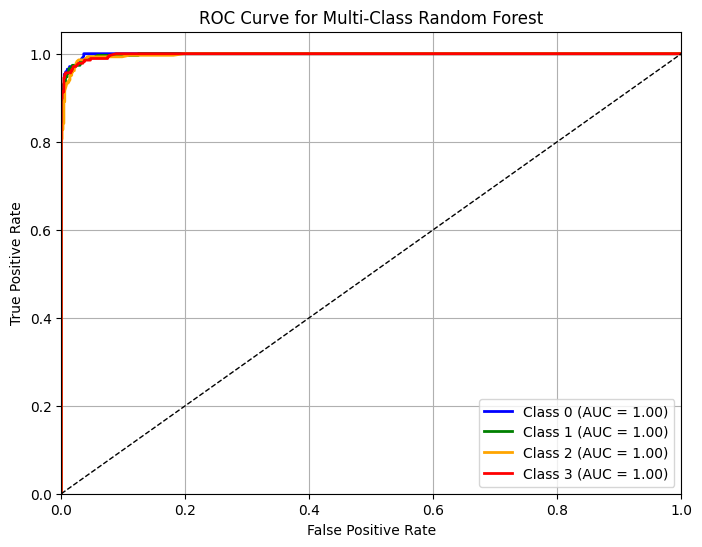

In [22]:
# Evaluate Random Forest with ROC curve
rf_results = evaluate_model(rf_model, x_test, y_test, model_name="Random Forest")

Training SVM Model...


c:\Users\Malv\Downloads\class\ai lab\ai-venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== SVM Results ===
Accuracy: 0.5430861723446894

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.42      0.74      0.53       171
    Negative       0.59      0.59      0.59       266
     Neutral       0.61      0.44      0.51       285
    Positive       0.60      0.48      0.54       276

    accuracy                           0.54       998
   macro avg       0.55      0.56      0.54       998
weighted avg       0.57      0.54      0.54       998



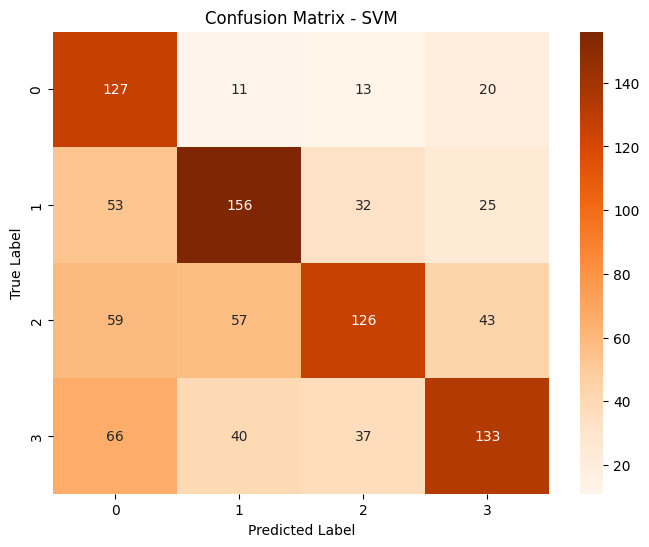

In [23]:
# ===================================
# SUPPORT VECTOR MACHINE (SVM) MODEL
# ===================================

from sklearn.svm import SVC

print("Training SVM Model...")
svm_model = SVC(kernel='linear', probability=True, random_state=42, max_iter=1000)
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

print("\n=== SVM Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

======= Evaluasi Klasifikasi SVM =======
Akurasi Klasifikasi     : 54.31%
F-measure (macro avg)   : 0.542
AUC rata-rata (macro)   : 0.824


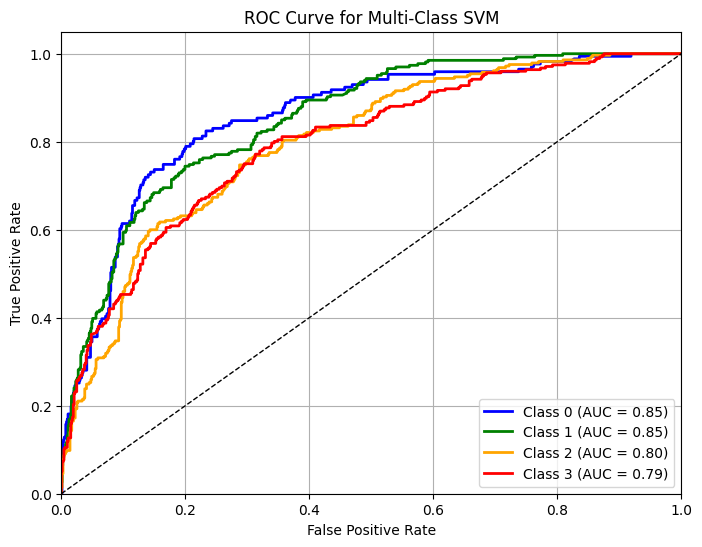

In [24]:
# Evaluate SVM with ROC curve
svm_results = evaluate_model(svm_model, x_test, y_test, model_name="SVM")

Training XGBoost Model...

=== XGBoost Results ===
Accuracy: 0.6102204408817635

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.37      0.51       171
    Negative       0.49      0.83      0.62       266
     Neutral       0.72      0.50      0.59       285
    Positive       0.66      0.66      0.66       276

    accuracy                           0.61       998
   macro avg       0.68      0.59      0.60       998
weighted avg       0.66      0.61      0.60       998



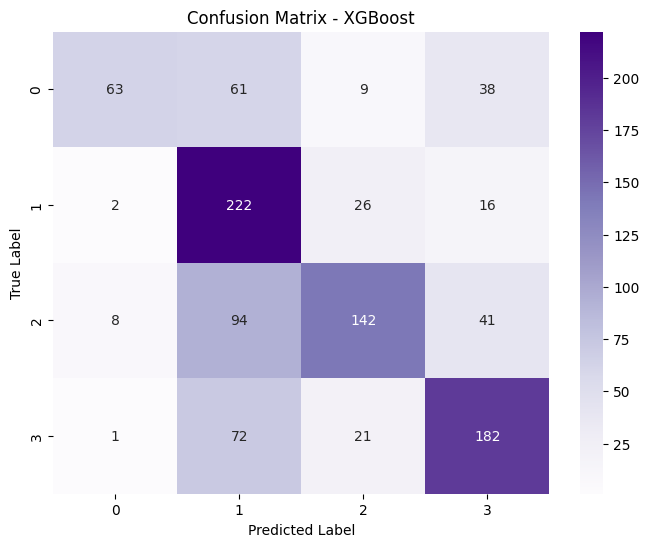

In [ ]:
# ===================================
# XGBOOST MODEL
# ===================================

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# XGBoost requires numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Training XGBoost Model...")
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)
xgb_model.fit(x_train, y_train_encoded)

y_pred_xgb_encoded = xgb_model.predict(x_test)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("\n=== XGBoost Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

======= Evaluasi Klasifikasi XGBoost =======
Akurasi Klasifikasi     : 61.02%
F-measure (macro avg)   : 0.595
AUC rata-rata (macro)   : 0.861


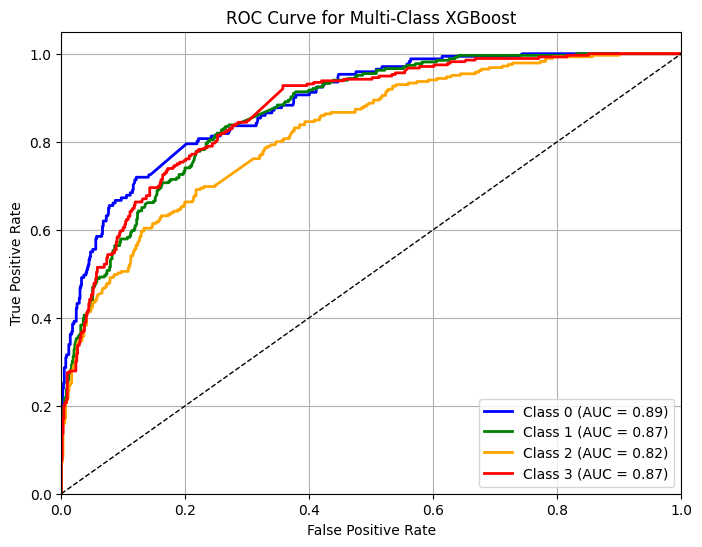

In [31]:
# Evaluate XGBoost with ROC curve
# Need to create a wrapper for XGBoost to work with evaluate_model function

class XGBWrapper:
    def __init__(self, xgb_model, label_encoder):
        self.xgb_model = xgb_model
        self.label_encoder = label_encoder
        self.classes_ = label_encoder.classes_
    
    def predict(self, X):
        y_pred_encoded = self.xgb_model.predict(X)
        return self.label_encoder.inverse_transform(y_pred_encoded)
    
    def predict_proba(self, X):
        return self.xgb_model.predict_proba(X)

xgb_wrapper = XGBWrapper(xgb_model, label_encoder)
xgb_results = evaluate_model(xgb_wrapper, x_test, y_test, model_name="XGBoost")


MODEL PERFORMANCE COMPARISON
              model  accuracy  f1_macro  auc_macro
Logistic Regression  0.900802  0.899438   0.972270
      Random Forest  0.960922  0.962110   0.998006
                SVM  0.543086  0.542165   0.824051
            XGBoost  0.610220  0.595371   0.860869


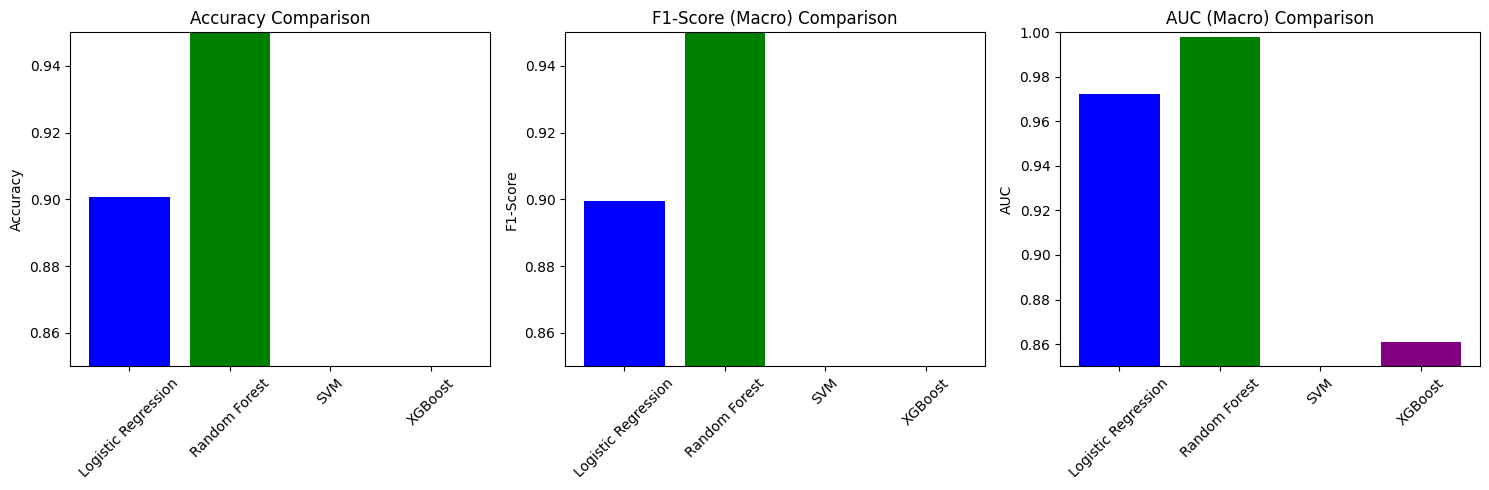


🏆 Best Model: Random Forest with Accuracy: 96.09%


In [32]:
# ===================================
# MODEL COMPARISON
# ===================================

import pandas as pd

# Compile all results
comparison_df = pd.DataFrame([
    lr_results,
    rf_results,
    svm_results,
    xgb_results
])

print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(comparison_df['model'], comparison_df['accuracy'], color=['blue', 'green', 'orange', 'purple'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.85, 0.95])
axes[0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[1].bar(comparison_df['model'], comparison_df['f1_macro'], color=['blue', 'green', 'orange', 'purple'])
axes[1].set_title('F1-Score (Macro) Comparison')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim([0.85, 0.95])
axes[1].tick_params(axis='x', rotation=45)

# AUC comparison
axes[2].bar(comparison_df['model'], comparison_df['auc_macro'], color=['blue', 'green', 'orange', 'purple'])
axes[2].set_title('AUC (Macro) Comparison')
axes[2].set_ylabel('AUC')
axes[2].set_ylim([0.85, 1.0])
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = comparison_df['accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'model']
best_accuracy = comparison_df.loc[best_model_idx, 'accuracy']

print(f"\n🏆 Best Model: {best_model} with Accuracy: {best_accuracy*100:.2f}%")

In [33]:
# ===================================
# TEST ALL MODELS ON NEW DATA
# ===================================

print("Testing all models on new data:")
print("="*60)
print(f"Text: {new_data['text'].values[0]}")
print(f"Actual Sentiment: {new_data['sentimen'].values[0]}")
print("="*60)

# Logistic Regression
lr_pred = model.predict(x_new)[0]
lr_proba = model.predict_proba(x_new)[0]
print(f"\n1. Logistic Regression: {lr_pred}")
print(f"   Confidence: {max(lr_proba)*100:.2f}%")

# Random Forest
rf_pred = rf_model.predict(x_new)[0]
rf_proba = rf_model.predict_proba(x_new)[0]
print(f"\n2. Random Forest: {rf_pred}")
print(f"   Confidence: {max(rf_proba)*100:.2f}%")

# SVM
svm_pred = svm_model.predict(x_new)[0]
svm_proba = svm_model.predict_proba(x_new)[0]
print(f"\n3. SVM: {svm_pred}")
print(f"   Confidence: {max(svm_proba)*100:.2f}%")

# XGBoost
xgb_pred_encoded = xgb_model.predict(x_new)[0]
xgb_pred = label_encoder.inverse_transform([xgb_pred_encoded])[0]
xgb_proba = xgb_model.predict_proba(x_new)[0]
print(f"\n4. XGBoost: {xgb_pred}")
print(f"   Confidence: {max(xgb_proba)*100:.2f}%")

print("\n" + "="*60)

Testing all models on new data:
Text: Just bought the new iPhone and I'm absolutely loving it! The camera quality is amazing 📸
Actual Sentiment: Positive

1. Logistic Regression: Positive
   Confidence: 48.98%

2. Random Forest: Positive
   Confidence: 73.40%

3. SVM: Positive
   Confidence: 41.76%

4. XGBoost: Positive
   Confidence: 58.08%

